# Be able to investigate client requirements for data analysis
# 2.4 Quantitative data analysis

* mean
* median
* standard deviation
* range

## Set up

In [1]:
try:
    import micropip
    await micropip.install(["pyoliteutils", "textblob"])
except:
    pass

In [2]:
from pyoliteutils import *
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/
sns.set(rc={"figure.figsize": (16, 5)})

In [3]:
crowds = pd.read_csv("../data/eagles/crowds_with_monthly_weather.csv")
#crowds = pd.read_csv("../data/eagles/crowds_clean.csv")
## https://datascienceparichay.com/article/pandas-extract-year-from-datetime-column/
crowds

,Date,Opponents,Attendance,Year,Day,Month,Month Name,Max Temperature C,Min Temperature C,af days,Rain mm,sun hours
0,1984-09-02,Rochdale,1425,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
1,1984-09-09,Fulham,1145,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
2,1984-09-23,Salford,1159,1984,Sunday,9,September,16.7,10.4,0,117.6,86.1
3,1984-10-14,Runcorn,1076,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6
4,1984-10-28,Bridgend,826,1984,Sunday,10,October,14.3,7.7,0,82.7,75.6
...,...,...,...,...,...,...,...,...,...,...,...,...
583,2022-07-24,Workington,644,2022,Sunday,7,July,23.2,14.5,0,23.8,187.8*
584,2022-08-07,Whitehaven,727,2022,Sunday,8,August,23.9,13.6,0,56.4,234.5*
585,2022-08-12,Halifax,569,2022,Friday,8,August,23.9,13.6,0,56.4,234.5*
586,2022-09-02,Featherstone,912,2022,Friday,9,September,18.4,11.1,0,50,124.8*


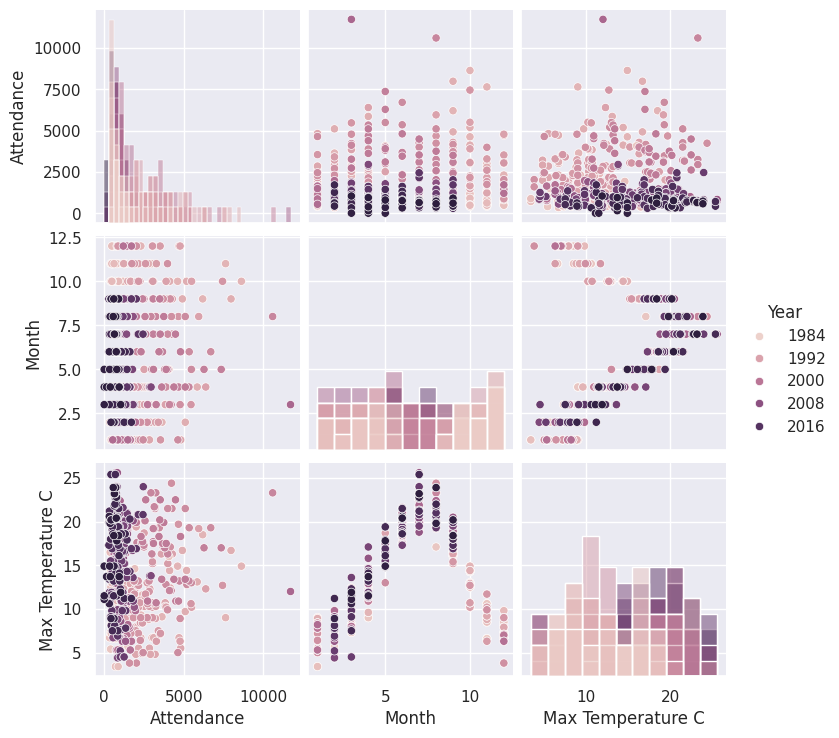

In [4]:
sns.pairplot(crowds, hue="Year", diag_kind="hist")

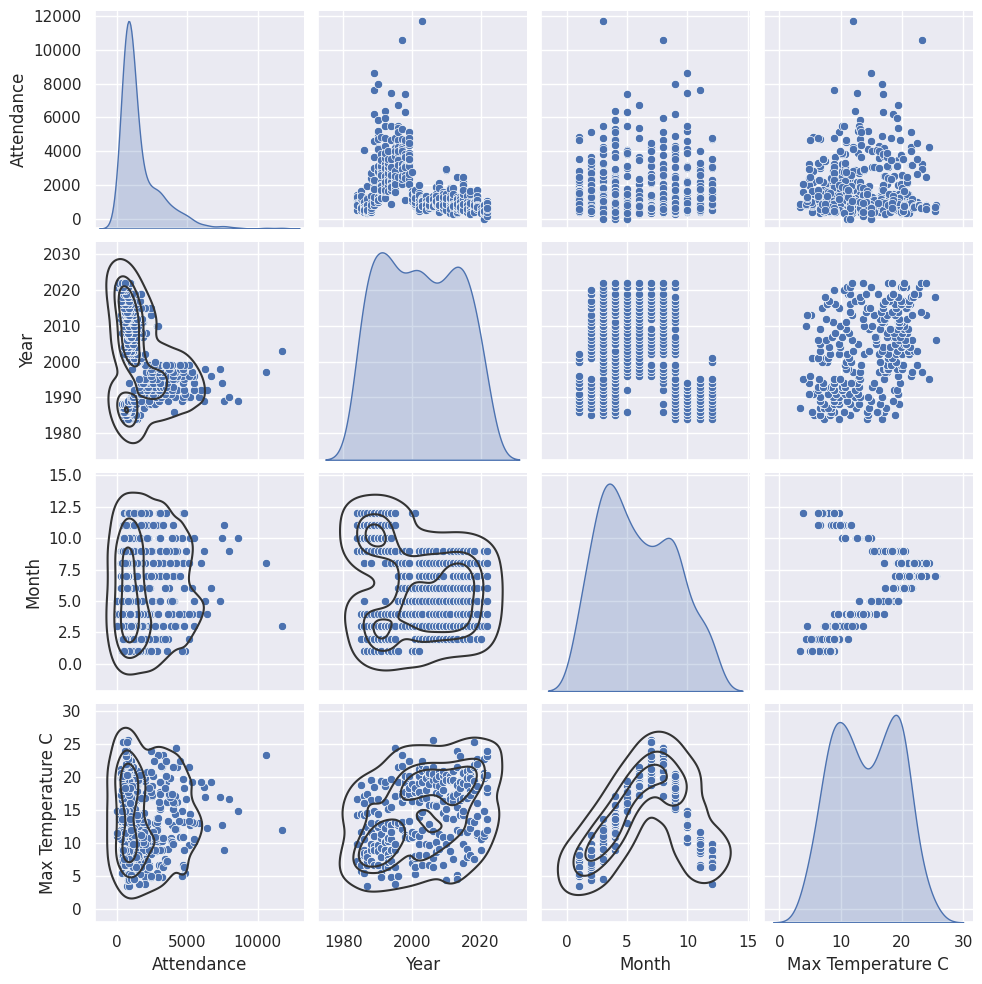

In [5]:
g = sns.pairplot(crowds, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
g

In [11]:
import numpy as np
import scipy.stats as stats
grouped = crowds.groupby('Year')
grouped


In [18]:
grouped.agg({'Attendance':'mean', "Max Temperature C": "mean"})

,Attendance,Max Temperature C
Year,,
1984,997.000000,12.020000
1985,859.666667,11.340000
1986,745.285714,11.942857
1987,734.250000,9.825000
1988,942.470588,11.747059
1989,3109.937500,10.506250
1990,3682.466667,11.460000
1991,2488.944444,9.622222
1992,3198.809524,11.657143


In [ ]:
(
    sns.barplot(
        data=crowds, x="Day", y="Attendance",
        estimator="mean"
    )
    .set(   title="Average Attendance by Day"
        )
)
plt.xticks(rotation=90)
plt.show()

In [ ]:

### try to normailse data by year to then be able to see patterns

## https://towardsdatascience.com/normalizing-features-within-groups-9873071f7e60




In [ ]:
(
    sns.barplot(
        data=crowds, x="Opponents", y="Attendance",
        estimator="mean", 
        errorbar= None # ("pi",100), #Percentile 
    )
    .set(   title="Average Attendance by Opponent"
        )
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

(
    sns.barplot(
        data=crowds, x="Year", y="Attendance",
        estimator="mean", errorbar=("pi",100),
        
    )
    .set(title="Average Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
(
    sns.boxplot(
        data=crowds, x="Year", y="Attendance",
        #hue="Opponents",
    )
   .set(title="Attendance by Year")
)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# sns.displot(crowds, x="Attendance", hue="Year", multiple="stack")

In [ ]:
stadiums = pd.read_csv("../data/eagles/stadiums_with_latlong.csv")
stadiums

In [ ]:
questionnaire = pd.read_csv("../data/eagles/questionnaire_quantitive.csv")
questionnaire

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap

In [ ]:
start_coords = (46.9540700, 142.7360300);
    
m = folium.Map(
    location=start_coords, 
    zoom_start=14, 
    #tiles="Stamen Terrain",
    width="100%", height="100%",
    control_scale=True,
);

only_located = questionnaire[["Are you:","Latitude", "Longitude"]].dropna()


only_located


In [ ]:
only_located_fans = only_located[only_located["Are you:"].str.contains("A current Sheffield Eagles fan who attends games")]

In [ ]:

heat_data = [[row["Latitude"],row["Longitude"]] for index, row in only_located_fans.iterrows() if "Latitude" in row and "Longitude" in row]

HeatMap(heat_data).add_to(m)


m.fit_bounds(m.get_bounds(), padding=(30, 30))

folium.TileLayer('cartodbpositron').add_to(m)
folium.TileLayer('openstreetmap').add_to(m)

# Add the option to switch tiles
folium.LayerControl().add_to(m)

fs = plugins.Fullscreen().add_to(m)

gc = plugins.Geocoder(collapsed=True, position='topleft', add_marker=True).add_to(m)

mc = plugins.MeasureControl( position='topleft').add_to(m)


m